In [1]:
from pyforest import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [26]:
df= pd.read_csv(r"train_ctrUa4K.csv")
df.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
df= df.drop("Loan_ID", axis=1)

In [28]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [29]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

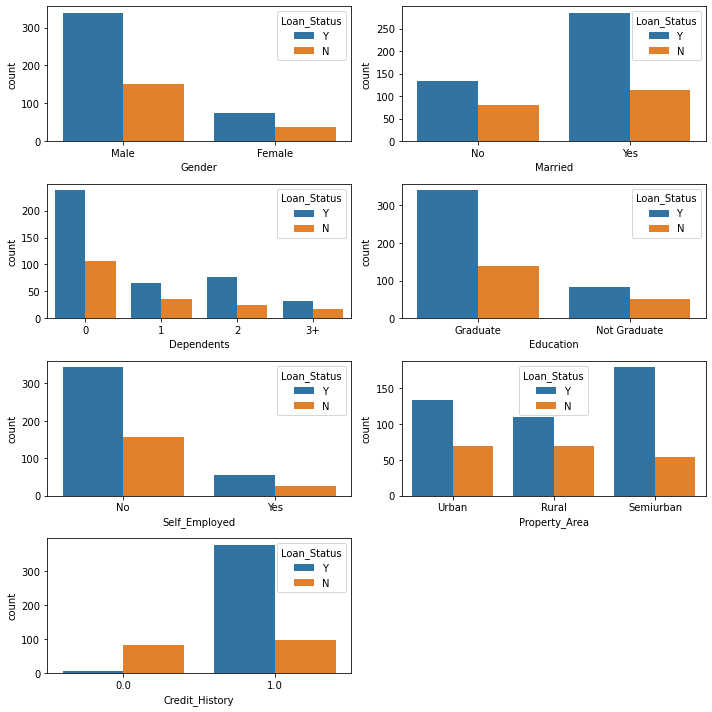

In [30]:
plt.figure(figsize=(10,10),)
plt.subplot(4,2,1)

sns.countplot(df.Gender, hue=df.Loan_Status)

plt.subplot(4,2,2)

sns.countplot(df.Married,hue=df.Loan_Status)

plt.subplot(4,2,3)

sns.countplot(df.Dependents, hue=df.Loan_Status)

plt.subplot(4,2,4)

sns.countplot(df.Education, hue=df.Loan_Status)

plt.subplot(4,2,5)

sns.countplot(df.Self_Employed, hue=df.Loan_Status)

plt.subplot(4,2,6)

sns.countplot(df.Property_Area, hue=df.Loan_Status)

plt.subplot(4,2,7)

sns.countplot(df.Credit_History, hue=df.Loan_Status)


plt.tight_layout()


##### filling the nan categorical columns with the highest frequency values within the same

In [31]:
df["Gender"]= df.Gender.fillna("Male", axis=0)
df["Married"]= df.Married.fillna("Yes", axis=0)
df["Dependents"]= df.Dependents.fillna("0", axis=0)
df["Education"]= df.Education.fillna("Graduate", axis=0)
df["Self_Employed"]= df.Self_Employed.fillna("No", axis=0)
df["Property_Area"]= df.Property_Area.fillna("Semiurban", axis=0)

In [32]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [34]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [35]:
df["Credit_History"]= df.Credit_History.fillna(1.0, axis=0)

In [36]:
df["LoanAmount"]= df.LoanAmount.fillna(df.LoanAmount.mean(), axis=0)
df["Loan_Amount_Term"]= df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), axis=0)

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
target_values = {'Y': 1 , 'N' : 0}

target = df['Loan_Status']
df["Loan_Status"] = target.map(target_values)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [40]:
df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [41]:
X= df.drop("Loan_Status", axis=1)

In [42]:
y= df.Loan_Status

In [45]:
X["Total_Income"]= df["ApplicantIncome"] + df["CoapplicantIncome"]

In [46]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0


In [47]:
X["Log_Total_Income"]= np.log(X.Total_Income)
X.head()

<IPython.core.display.Javascript object>

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Log_Total_Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0,8.699515


In [48]:
X_new= pd.get_dummies(X,drop_first=True)

<IPython.core.display.Javascript object>

In [52]:
X_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Log_Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,5849.0,8.674026,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,6091.0,8.714568,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,3000.0,8.006368,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,4941.0,8.505323,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,6000.0,8.699515,1,0,0,0,0,0,0,0,1


In [53]:
X_1= X_new.drop('CoapplicantIncome', axis=1)

In [55]:
#dropping the coapplicant income as it is embedded with total income

In [54]:
X_1.head(4)

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Log_Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,146.412162,360.0,1.0,5849.0,8.674026,1,0,0,0,0,0,0,0,1
1,4583,128.000000,360.0,1.0,6091.0,8.714568,1,1,1,0,0,0,0,0,0
2,3000,66.000000,360.0,1.0,3000.0,8.006368,1,1,0,0,0,0,1,0,1
3,2583,120.000000,360.0,1.0,4941.0,8.505323,1,1,0,0,0,1,0,0,1


In [56]:
model= LogisticRegression()

In [61]:
X_train,X_test,y_train,y_test= train_test_split(X_1,y,test_size=0.3,random_state=42)

In [62]:
model.fit(X_train,y_train)

C:\Users\1234\anaconda3\envs\sagnik\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred= model.predict(X_test)

In [64]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [65]:
model.score(X_test,y_test)

0.7621621621621621

In [66]:
test= pd.read_csv(r"test_lAUu6dG.csv")
test.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [67]:
test= test.drop("Loan_ID", axis=1)

In [68]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [69]:
test["Gender"]= test.Gender.fillna("Male", axis=0)
test["Married"]= test.Married.fillna("Yes", axis=0)
test["Dependents"]= test.Dependents.fillna("0", axis=0)
test["Education"]= test.Education.fillna("Graduate", axis=0)
test["Self_Employed"]= test.Self_Employed.fillna("No", axis=0)
test["Property_Area"]= test.Property_Area.fillna("Semiurban", axis=0)

In [70]:
test["Credit_History"]= test.Credit_History.fillna(1.0, axis=0)

In [71]:
test["LoanAmount"]= test.LoanAmount.fillna(test.LoanAmount.mean(), axis=0)
test["Loan_Amount_Term"]= test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean(), axis=0)

In [72]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [73]:
test["Total_Income"]= test["ApplicantIncome"] + test["CoapplicantIncome"]

In [74]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


In [75]:
test["Log_Total_Income"]= np.log(test.Total_Income)
test.head()

<IPython.core.display.Javascript object>

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Log_Total_Income
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378


In [76]:
test= pd.get_dummies(test,drop_first=True)

<IPython.core.display.Javascript object>

In [77]:
test= test.drop("CoapplicantIncome", axis=1)

In [78]:
test.head()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Log_Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,110.0,360.0,1.0,5720,8.651724,1,1,0,0,0,0,0,0,1
1,3076,126.0,360.0,1.0,4576,8.428581,1,1,1,0,0,0,0,0,1
2,5000,208.0,360.0,1.0,6800,8.824678,1,1,0,1,0,0,0,0,1
3,2340,100.0,360.0,1.0,4886,8.494129,1,1,0,1,0,0,0,0,1
4,3276,78.0,360.0,1.0,3276,8.094378,1,0,0,0,0,1,0,0,1


In [79]:
test_pred= model.predict(test)

In [80]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [81]:
data= pd.DataFrame({"Loan_Status":test_pred})

<IPython.core.display.Javascript object>

In [82]:
data.to_csv("submission.csv")